# **Reading and Displaying Rasters Using GDAL in Python**
**Author: Krishnagopal Halder** <br>

GDAL (Geospatial Data Abstraction Library) is a powerful open-source library for reading, writing, and manipulating geospatial raster and vector data formats. It provides a wide range of functionalities to work with various GIS (Geographic Information System) data formats, including popular ones like GeoTIFF, Shapefile, and many others. In Python, GDAL can be accessed through the osgeo module, which is a part of the GDAL project.

GDAL in Python allows you to perform tasks such as reading and writing raster and vector datasets, extracting metadata, transforming and projecting data, and performing various geospatial analysis operations. With its extensive capabilities, GDAL enables developers and data scientists to process geospatial data efficiently, making it a valuable tool in fields such as remote sensing, environmental modeling, and geospatial analysis.

To work with GDAL in Python, you'll need to have the GDAL library installed on your system. You can install it using package managers like pip or conda. Once installed, you can import the necessary modules from osgeo to begin working with geospatial data.

## **01. Importing Required Libraries**

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from osgeo import gdal
from osgeo.gdalconst import GA_ReadOnly
from osgeo import osr
import warnings
warnings.filterwarnings("ignore")

## **02. Setting Up the Current Working Directory**

In [2]:
# Checking the current working directory
os.getcwd()

'D:\\Coding\\Codes\\Image_Analysis_with_Python'

In [3]:
# Changing the current working directory
file_path = r"D:\GIS Project\Research Projects\Mangrove_Extent_Mapping\New Satellite Images"
os.chdir(file_path)

In [4]:
# Checking the current working directory
os.getcwd()

'D:\\GIS Project\\Research Projects\\Mangrove_Extent_Mapping\\New Satellite Images'

## **03. Reading Raster with GDAL**

**gdal.AllRegister():** <br>
gdal.AllRegister() is a function from the GDAL (Geospatial Data Abstraction Library) library. It is used to register all available GDAL drivers. Before using any GDAL functionality, it is necessary to register the available drivers. The gdal.AllRegister() function ensures that all GDAL drivers are registered and available for use in the current session. By registering the drivers, GDAL becomes aware of the formats it can read and write, allowing you to work with different geospatial data formats seamlessly.

In [5]:
# Registering all available GDAL drivers
gdal.AllRegister()

**Dataset Description:** <br>
The raster data that has been created using the Google Earth Engine platform by compositing cloud masked Landsat 8 images of the year 2022 is a multi-band dataset comprising a total of 9 bands. Each band represents a different type of spectral index derived from the Landsat 8 satellite imagery.

Spectral indices are mathematical calculations applied to remote sensing data to extract specific information about the land surface characteristics. These indices are often used to monitor vegetation health, detect changes in land cover, assess water quality, and perform various other types of analysis.

In [6]:
# Defining the path of the raster image
raster_name = "Mangrove_Composite_2022_New.tif"
file = file_path + "\\" + raster_name

In [7]:
# Checking the metadata of the raster image using command line
!gdalinfo -nomd Mangrove_Composite_2022_New.tif

Driver: GTiff/GeoTIFF
Files: Mangrove_Composite_2022_New.tif
       Mangrove_Composite_2022_New.tif.aux.xml
Size is 7389, 4131
Coordinate System is:
GEOGCRS["WGS 84",
    DATUM["World Geodetic System 1984",
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1,
                ID["EPSG",9001]]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433,
            ID["EPSG",9122]]],
    CS[ellipsoidal,2],
        AXIS["latitude",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433,
                ID["EPSG",9122]]],
        AXIS["longitude",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433,
                ID["EPSG",9122]]]]
Data axis to CRS axis mapping: 2,1
Origin = (88.134700671778788,22.522740466501467)
Pixel Size = (0.000269494585236,-0.000269494585236)
Corner Coordinates:
Upper Left  (  88.1347007,  22.5227405) ( 88d 8' 4.92"E, 22d31'21.87"N)
Lower Left  (  88.1347007,  21.4094583) 

Warning 1: PROJ: proj_create_from_database: C:\Program Files\PostgreSQL\15\share\contrib\postgis-3.3\proj\proj.db contains DATABASE.LAYOUT.VERSION.MINOR = 0 whereas a number >= 2 is expected. It comes from another PROJ installation.


In [8]:
# Reading the raster dataset with GDAL
dataset = gdal.Open(file, GA_ReadOnly)

## **04. Checking the Properties of the Raster File**

In [9]:
# Checking the type of the dataset variable
type(dataset)

osgeo.gdal.Dataset

RasterXSize, RasterYSize, and RasterCount are attributes of a GDAL dataset object. These attributes provide information about the size and composition of a raster image.

* **RasterXSize:** This attribute represents the width of the raster image in pixels. It provides the number of columns or the horizontal dimension of the image.

* **RasterYSize:** This attribute represents the height of the raster image in pixels. It provides the number of rows or the vertical dimension of the image.

* **RasterCount:** This attribute represents the number of bands or layers in the raster image. A band typically represents a specific data type or characteristic of the image, such as red, green, blue (RGB) bands in a color image or different spectral bands in a multispectral image. Each band contains pixel values corresponding to its specific data type or characteristic.

In [10]:
# Getting the width, height, number of bands of the image
nCols = dataset.RasterXSize
nRows = dataset.RasterYSize
nBands = dataset.RasterCount
print("Number of Cloumns (Image Width):", nCols)
print("Number of Rows (Image Height):", nRows)
print("Number of Bands:", nBands)

Number of Cloumns (Image Width): 7389
Number of Rows (Image Height): 4131
Number of Bands: 9


GetProjection() and GetGeoTransform() are methods of a GDAL dataset object. These methods provide information about the spatial properties and coordinate system of a raster image.

* **GetProjection():** This method retrieves the projection information of the raster image. The projection defines how the geographic coordinates (latitude and longitude) are mapped to the pixel coordinates in the image. The projection information is typically represented as a well-known text (WKT) string, which describes the coordinate reference system (CRS) used by the image.

* **GetGeoTransform():** This method retrieves the georeferencing information of the raster image. The georeferencing information describes the transformation between the pixel coordinates in the image and real-world geographic coordinates. It consists of six coefficients that define the origin, pixel size, and rotation of the image.

In [11]:
# Getting the coordinate information of the raster image
print("Coordinate System:", dataset.GetProjection(), sep="\n")

Coordinate System:
GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]


In [12]:
# Getting the transformation coefficients
geoTransform = dataset.GetGeoTransform()
print(geoTransform)

(88.13470067177879, 0.00026949458523585647, 0.0, 22.522740466501467, 0.0, -0.00026949458523585647)


In [13]:
print("Origin:", geoTransform[0], geoTransform[3])
print("Pixel Size:", geoTransform[1], geoTransform[5])

Origin: 88.13470067177879 22.522740466501467
Pixel Size: 0.00026949458523585647 -0.00026949458523585647


In [14]:
print("Upper Left Corner:", gdal.ApplyGeoTransform(geoTransform, 0, 0))
print("Upper Right Corner:", gdal.ApplyGeoTransform(geoTransform, nCols, 0))
print("Lower Left Corner:", gdal.ApplyGeoTransform(geoTransform, 0, nRows))
print("Lower Right Corner:", gdal.ApplyGeoTransform(geoTransform, nCols, nRows))
print("Center:", gdal.ApplyGeoTransform(geoTransform, nCols/2, nRows/2))

Upper Left Corner: [88.13470067177879, 22.522740466501467]
Upper Right Corner: [90.12599616208654, 22.522740466501467]
Lower Left Corner: [88.13470067177879, 21.409458334892143]
Lower Right Corner: [90.12599616208654, 21.409458334892143]
Center: [89.13034841693266, 21.966099400696805]


GetMetadata() is a methods of a GDAL dataset object. This method is used to retrieve metadata associated with a raster image.

* **GetMetadata():** This method retrieves all metadata associated with the dataset. Metadata provides additional information about the dataset, such as the data source, acquisition parameters, processing history, or any other relevant details. The GetMetadata method returns a dictionary object containing key-value pairs of the metadata items.

* **GetMetadata("IMAGE_STRUCTURE"):** This method retrieves metadata specifically related to the image structure. The "IMAGE_STRUCTURE" parameter is passed to specify the category of metadata to retrieve. This category typically contains information about the structure and organization of the image data, such as the color interpretation, pixel data type, compression, or block size.

In [15]:
# Checking the metadata of the raster
print("Metadata:", dataset.GetMetadata())

Metadata: {'AREA_OR_POINT': 'Area'}


In [16]:
print("Image Structure Metadata:", dataset.GetMetadata("IMAGE_STRUCTURE"))

Image Structure Metadata: {'COMPRESSION': 'LZW', 'INTERLEAVE': 'PIXEL'}


## **05. Reading the Bands of the Raster**

**GetRasterBand():** is used to retrieve each band of the dataset within a loop. The band index starts from 1, so nBands + 1 is passed as an argument to GetRasterBand() to obtain each band.

The **GetDescription()** method is then called on each band object (band) to retrieve the band description. The band description can be a user-defined label or a description assigned to the band.

After that, the **ComputeStatistics()** method is used to compute statistics for each band. The False argument passed to ComputeStatistics() indicates that the function should not force computation of statistics if they are not available.

In [17]:
# Extracting the description of all the bands
for i in range(1, nBands + 1):
    band = dataset.GetRasterBand(i)
    band_description = band.GetDescription()
    print(f"Band{i}: {band_description}")

Band1: NDVI
Band2: NDWI
Band3: MNDWI
Band4: SR
Band5: R64
Band6: EVI
Band7: SAVI
Band8: GCVI
Band9: CMRI


In [18]:
# Checking statistics of the raster image using command line
!gdalinfo -stats Mangrove_Composite_2022_New.tif

Driver: GTiff/GeoTIFF
Files: Mangrove_Composite_2022_New.tif
       Mangrove_Composite_2022_New.tif.aux.xml
Size is 7389, 4131
Coordinate System is:
GEOGCRS["WGS 84",
    DATUM["World Geodetic System 1984",
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1,
                ID["EPSG",9001]]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433,
            ID["EPSG",9122]]],
    CS[ellipsoidal,2],
        AXIS["latitude",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433,
                ID["EPSG",9122]]],
        AXIS["longitude",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433,
                ID["EPSG",9122]]]]
Data axis to CRS axis mapping: 2,1
Origin = (88.134700671778788,22.522740466501467)
Pixel Size = (0.000269494585236,-0.000269494585236)
Metadata:
  AREA_OR_POINT=Area
Image Structure Metadata:
  COMPRESSION=LZW
  INTERLEAVE=PIXEL
Corner Coordinates:
Upper Left  (  88.

Warning 1: PROJ: proj_create_from_database: C:\Program Files\PostgreSQL\15\share\contrib\postgis-3.3\proj\proj.db contains DATABASE.LAYOUT.VERSION.MINOR = 0 whereas a number >= 2 is expected. It comes from another PROJ installation.


In [19]:
# Calculating the statistics of all the bands
for i in range(1, nBands + 1):
    band = dataset.GetRasterBand(i)
    (minimum, maximum, mean, stdDev) = band.ComputeStatistics(False)
    print("band{:d}, min={:.3f}, max={:.3f}, mean={:.3f}, stdDev={:.3f}"\
          .format(i, minimum, maximum, mean, stdDev))

band1, min=-1.000, max=0.998, mean=0.143, stdDev=0.533
band2, min=-0.890, max=1.000, mean=-0.073, stdDev=0.537
band3, min=-0.691, max=0.955, mean=0.185, stdDev=0.528
band4, min=-1.990, max=25.301, mean=2.617, stdDev=2.549
band5, min=-6.116, max=7.029, mean=1.351, stdDev=1.106
band6, min=-0.176, max=0.882, mean=0.153, stdDev=0.232
band7, min=-0.180, max=0.638, mean=0.140, stdDev=0.225
band8, min=-1.212, max=7.440, mean=1.015, stdDev=1.754
band9, min=-2.000, max=1.665, mean=0.216, stdDev=1.067


The **ReadAsArray()** method in GDAL is used to read the pixel values of a raster band into a NumPy array. It allows you to access the actual pixel data for further processing or analysis.

In [20]:
# Reading the first band (NDVI) of the raster image
ndvi = dataset.GetRasterBand(1)
# Converting the raster band into NumPy array
ndviArray = ndvi.ReadAsArray()

In [21]:
# Printing the NDVI array
ndviArray

array([[ 0.5932275 ,  0.6825713 ,  0.6432745 , ...,  0.60222274,
         0.61555135,  0.60747015],
       [ 0.6556865 ,  0.66693413,  0.4954174 , ...,  0.7323491 ,
         0.7152846 ,  0.68692017],
       [ 0.5521198 ,  0.4576405 ,  0.31088647, ...,  0.76063   ,
         0.782261  ,  0.7843639 ],
       ...,
       [-0.7036572 , -0.82086855, -0.7883714 , ..., -0.4197355 ,
        -0.47063217, -0.44227886],
       [-0.725337  , -0.7548989 , -0.5765263 , ..., -0.46309575,
        -0.4435428 , -0.44717714],
       [-0.5611885 , -0.8945765 , -0.8920666 , ..., -0.43678167,
        -0.54648304, -0.5870311 ]], dtype=float32)

In [22]:
# Printing the shape of the NDVI array
ndviArray.shape

(4131, 7389)

In [23]:
# Reading the second band of the raster image
ndwi = dataset.GetRasterBand(2)
# Converting the raster band into NumPy array
ndwiArray = ndwi.ReadAsArray()

In [24]:
# Checking the shape of the NDWI array
ndwiArray.shape

(4131, 7389)

## **06. Plotting the Raster Band**

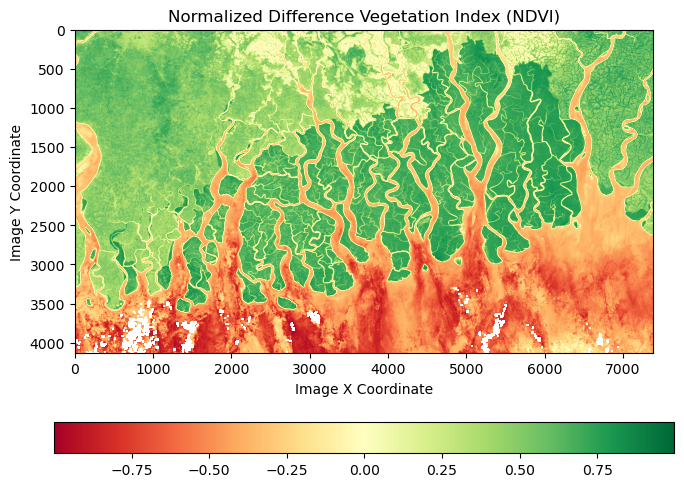

In [25]:
# Plotting the NDVI band
plt.figure(figsize=(8, 6))
plt.imshow(ndviArray, cmap="RdYlGn")
plt.title("Normalized Difference Vegetation Index (NDVI)")
plt.xlabel("Image X Coordinate")
plt.ylabel("Image Y Coordinate")
plt.colorbar(orientation="horizontal")
plt.show()

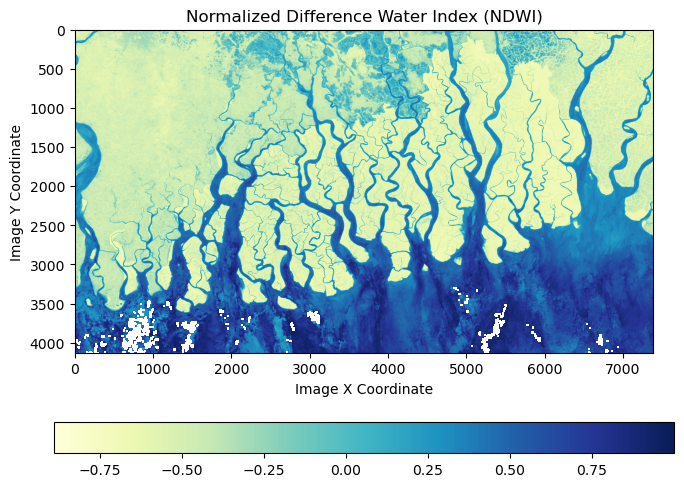

In [26]:
plt.figure(figsize=(8, 6))
plt.imshow(ndwiArray, cmap="YlGnBu")
plt.title("Normalized Difference Water Index (NDWI)")
plt.xlabel("Image X Coordinate")
plt.ylabel("Image Y Coordinate")
plt.colorbar(orientation="horizontal")
plt.show()

## **07. Automating the Process using Custom Function**

In [27]:
# Creating a function to check the bands description of a raster
def checkBands(data):
    gdal.AllRegister()
    dataset = gdal.Open(data, GA_ReadOnly)
    
    # Getting the number of bands in the raster
    nBands = dataset.RasterCount
    
    # Printing the raster band description
    for i in range(1, nBands + 1):
        band = dataset.GetRasterBand(i)
        band_info = band.GetDescription()
        print(f"Band{i}: {band_info}")

In [28]:
# Creating a function to plot the bands of a raster
def plotBand(data, band_num, palette, title):
    # Reading the raster band
    gdal.AllRegister()
    dataset = gdal.Open(data, GA_ReadOnly)
    rasterBand = dataset.GetRasterBand(band_num)
    
    # Convering the raster image to NumPy array
    bandArray = rasterBand.ReadAsArray()
    
    # Plotting the raster band
    plt.figure(figsize=(8, 6))
    plt.imshow(bandArray, cmap=palette)
    plt.title(title)
    plt.xlabel("Image X Coordinate")
    plt.ylabel("Image Y Coordinate")
    plt.colorbar(orientation="horizontal")
    plt.show()

In [29]:
# Testing the functions
data_path = r"D:\GIS Project\Research Projects\Mangrove_Extent_Mapping\New Satellite Images\Mangrove_Composite_2022_New.tif"
# Checking the bands information using checkbands() function
checkBands(data_path)

Band1: NDVI
Band2: NDWI
Band3: MNDWI
Band4: SR
Band5: R64
Band6: EVI
Band7: SAVI
Band8: GCVI
Band9: CMRI


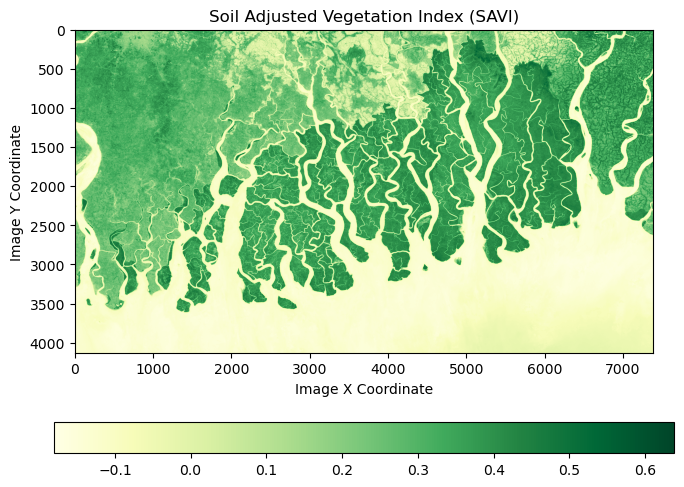

In [30]:
# Plotting the bands using the plotBand() function
plotBand(data_path, 7, "YlGn", "Soil Adjusted Vegetation Index (SAVI)")